In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('MoviesOnStreamingPlatforms.csv')
print(df.dtypes)
print(df.describe(include='all'))

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object
         Unnamed: 0           ID         Title         Year   Age  \
count   9515.000000  9515.000000          9515  9515.000000  5338   
unique          NaN          NaN          9515          NaN     5   
top             NaN          NaN  The Irishman          NaN   18+   
freq            NaN          NaN             1          NaN  2276   
mean    4757.000000  4758.000000           NaN  2007.422386   NaN   
std     2746.888239  2746.888239           NaN    19.130367   NaN   
min        0.000000     1.000000           NaN  1914.000000   NaN   
25%     2378.500000  2379.500000           NaN  2006.000000   NaN   
50%     4757.000000  4758.000000           NaN  2015.000000   NaN   
75%     71

In [6]:
df.replace("?", np.nan, inplace = True)

In [7]:
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
Unnamed: 0
False    9515
Name: count, dtype: int64

ID
ID
False    9515
Name: count, dtype: int64

Title
Title
False    9515
Name: count, dtype: int64

Year
Year
False    9515
Name: count, dtype: int64

Age
Age
False    5338
True     4177
Name: count, dtype: int64

Rotten Tomatoes
Rotten Tomatoes
False    9508
True        7
Name: count, dtype: int64

Netflix
Netflix
False    9515
Name: count, dtype: int64

Hulu
Hulu
False    9515
Name: count, dtype: int64

Prime Video
Prime Video
False    9515
Name: count, dtype: int64

Disney+
Disney+
False    9515
Name: count, dtype: int64

Type
Type
False    9515
Name: count, dtype: int64



In [9]:
# Handling missing values in Age
df['Age'] = df['Age'].map({'18+': 1, '7+': 2, '13+': 3, '16+': 4, 'all': 5})
imputer = KNNImputer(n_neighbors=10)
df[['Age']] = imputer.fit_transform(df[['Age']])
df['Age'].tail(20)

9495    4.000000
9496    2.256276
9497    2.256276
9498    2.256276
9499    2.000000
9500    2.256276
9501    2.256276
9502    2.256276
9503    4.000000
9504    2.256276
9505    2.000000
9506    2.256276
9507    3.000000
9508    3.000000
9509    2.256276
9510    2.256276
9511    2.256276
9512    2.256276
9513    2.256276
9514    2.000000
Name: Age, dtype: float64

In [70]:
# Round Age values to ensure they are integers
df['Age'] = df['Age'].round().astype(int)

# Ensure Age contains only the intended values (1, 2, 3, 4, 5)
valid_age_values = [1, 2, 3, 4, 5]
df = df[df['Age'].isin(valid_age_values)]

In [48]:
# Handling missing values in Rotten Tomatoes scores
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(str)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.split('/').str[0].astype(float)
imputer = KNNImputer(n_neighbors=10)
df['Rotten Tomatoes'] = imputer.fit_transform(df[['Rotten Tomatoes']])
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].round().astype('int64')
df['Rotten Tomatoes'].tail(20)

9495    33
9496    33
9497    33
9498    33
9499    32
9500    32
9501    31
9502    16
9503    16
9504    15
9505    14
9506    14
9507    14
9508    14
9509    14
9510    14
9511    13
9512    13
9513    10
9514    10
Name: Rotten Tomatoes, dtype: int64

In [49]:
# Check missing values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
ID                 0
Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64


In [50]:
# Check last 10 rows of df
df.tail(10)

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
9505,9506,Great Shark Chow Down,2019,2,14,0,0,0,1,0
9506,9507,In Beaver Valley,1950,2,14,0,0,0,1,0
9507,9508,Texas Storm Squad,2020,3,14,0,0,0,1,0
9508,9509,What the Shark?,2020,3,14,0,0,0,1,0
9509,9510,Built for Mars: The Perseverance Rover,2021,2,14,0,0,0,1,0
9510,9511,Most Wanted Sharks,2020,2,14,0,0,0,1,0
9511,9512,Doc McStuffins: The Doc Is In,2020,2,13,0,0,0,1,0
9512,9513,Ultimate Viking Sword,2019,2,13,0,0,0,1,0
9513,9514,Hunt for the Abominable Snowman,2011,2,10,0,0,0,1,0
9514,9515,Women of Impact: Changing the World,2019,2,10,0,0,0,1,0


In [51]:
# The columns to keep
columns_to_keep = ['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type']

# Drop all columns except the ones to keep
df = df[columns_to_keep]
df.tail(10)

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
9505,9506,Great Shark Chow Down,2019,2,14,0,0,0,1,0
9506,9507,In Beaver Valley,1950,2,14,0,0,0,1,0
9507,9508,Texas Storm Squad,2020,3,14,0,0,0,1,0
9508,9509,What the Shark?,2020,3,14,0,0,0,1,0
9509,9510,Built for Mars: The Perseverance Rover,2021,2,14,0,0,0,1,0
9510,9511,Most Wanted Sharks,2020,2,14,0,0,0,1,0
9511,9512,Doc McStuffins: The Doc Is In,2020,2,13,0,0,0,1,0
9512,9513,Ultimate Viking Sword,2019,2,13,0,0,0,1,0
9513,9514,Hunt for the Abominable Snowman,2011,2,10,0,0,0,1,0
9514,9515,Women of Impact: Changing the World,2019,2,10,0,0,0,1,0


In [52]:
# Prepare data for regression
X = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Year', 'Age']]
y = df['Rotten Tomatoes']

In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Fit linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions
y_pred = lm.predict(X_test)


In [56]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')

Mean Squared Error: 160.77475670660752
R-squared: 0.07771846912213498
Coefficients: [ 6.43833637e+00  1.22234454e+01  2.24492334e+00  1.15013547e+01
 -7.76161430e-04 -5.75693990e-01]
Intercept: 50.36730400741265


In [57]:
# Print coefficients and their corresponding features
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Netflix         6.438336
Hulu           12.223445
Prime Video     2.244923
Disney+        11.501355
Year           -0.000776
Age            -0.575694


In [58]:
# Calculate Pearson correlation coefficients
pearson_corr_platforms = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Age', 'Rotten Tomatoes']].corr()['Rotten Tomatoes'].drop('Rotten Tomatoes')
print("Pearson Correlation Coefficients between Streaming Platforms, Age, and Rotten Tomatoes Ratings:")
print(pearson_corr_platforms)

Pearson Correlation Coefficients between Streaming Platforms, Age, and Rotten Tomatoes Ratings:
Netflix        0.054464
Hulu           0.182635
Prime Video   -0.208128
Disney+        0.118365
Age           -0.002720
Name: Rotten Tomatoes, dtype: float64


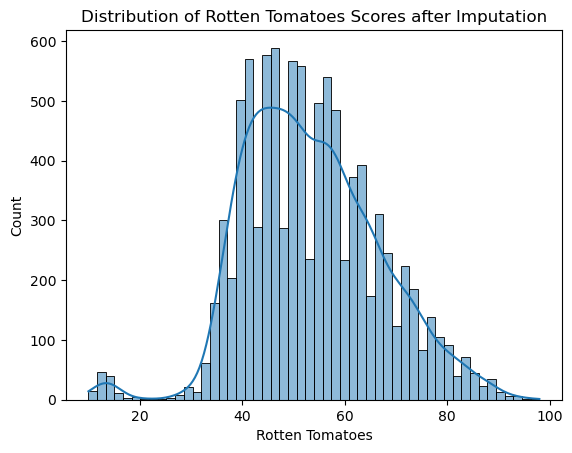

In [59]:
# Visualize the distribution of Rotten Tomatoes scores after imputation
sns.histplot(df['Rotten Tomatoes'], kde=True)
plt.title('Distribution of Rotten Tomatoes Scores after Imputation')
plt.show()

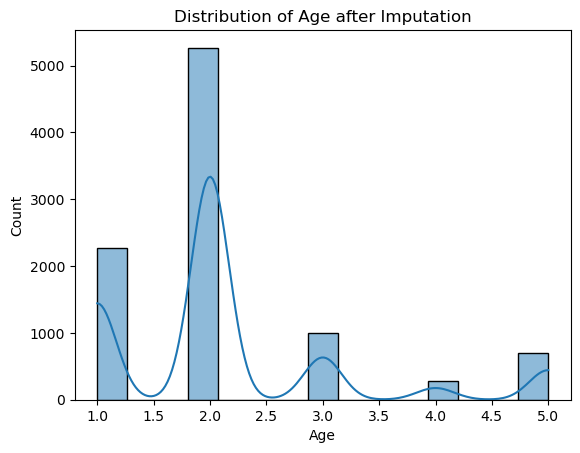

In [60]:
# Visualize the distribution of Age after imputation
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age after Imputation')
plt.show()

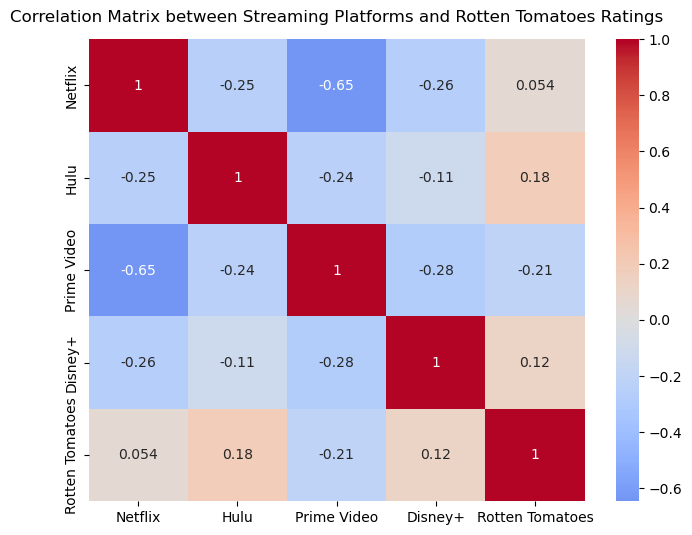

In [61]:
# Visualize correlation between Streaming Platforms and Rotten Tomatoes
# Heatmap
correlation_matrix = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Rotten Tomatoes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Streaming Platforms and Rotten Tomatoes Ratings', y=1.02)
plt.show()

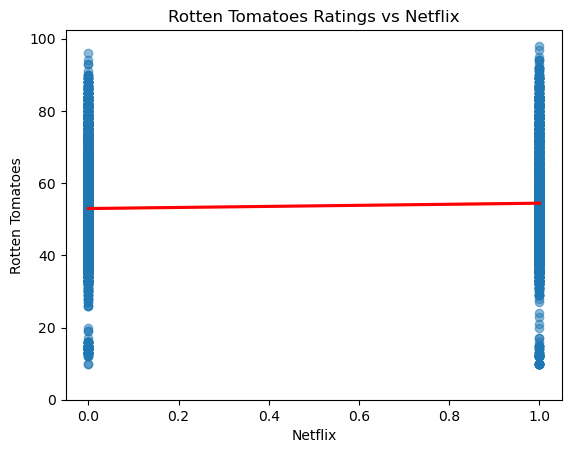

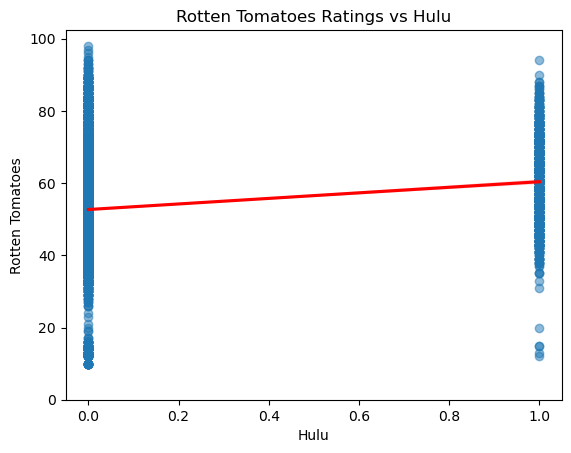

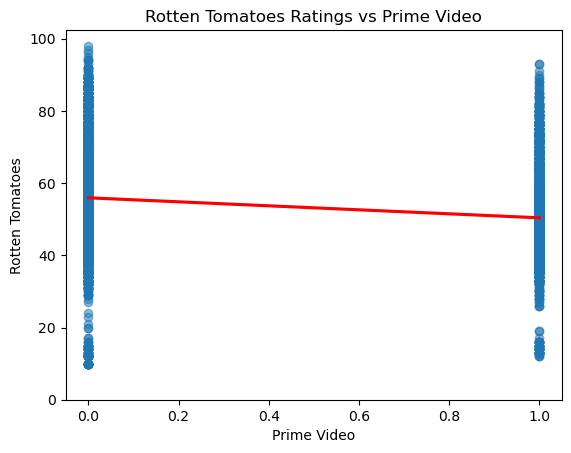

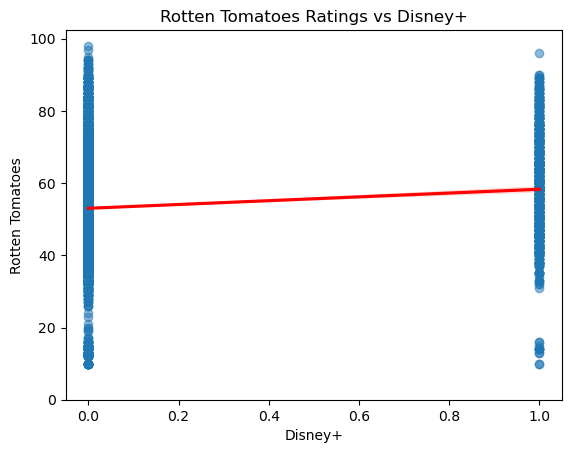

In [62]:
# Visualize correlation between Streaming Platforms and Rotten Tomatoes
# Scatter Plots with Regression Line
features = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
for feature in features:
    sns.regplot(x=feature, y='Rotten Tomatoes', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Rotten Tomatoes Ratings vs {feature}')
    plt.ylim(0,)
    plt.show()


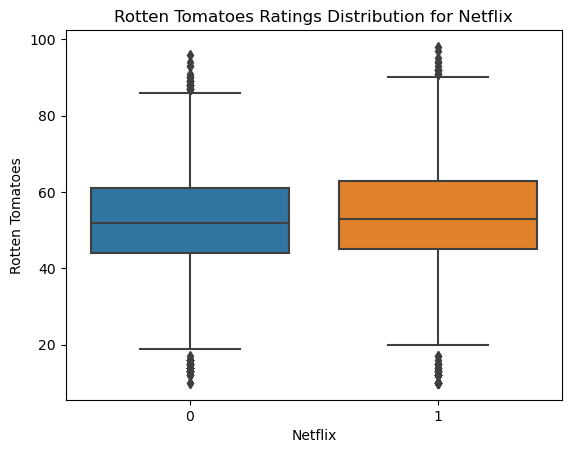

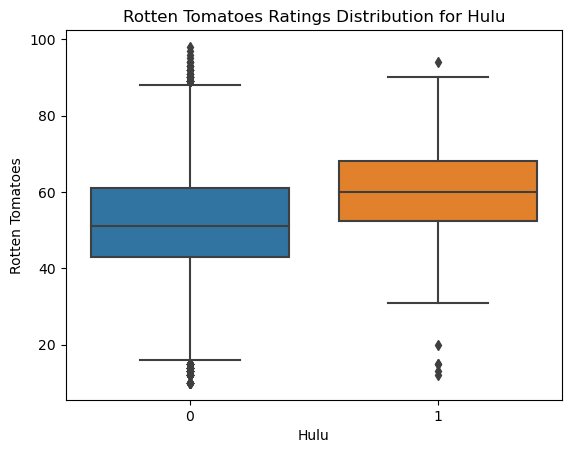

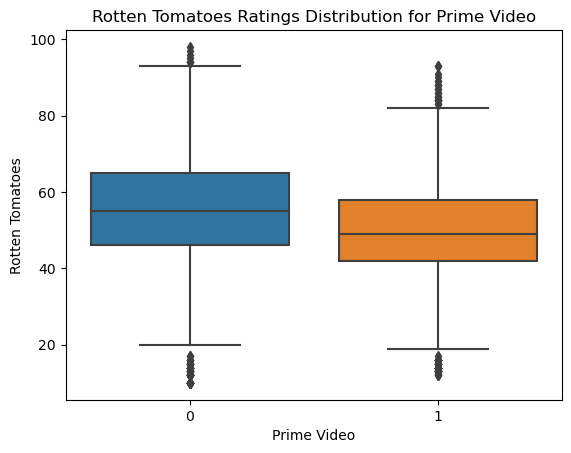

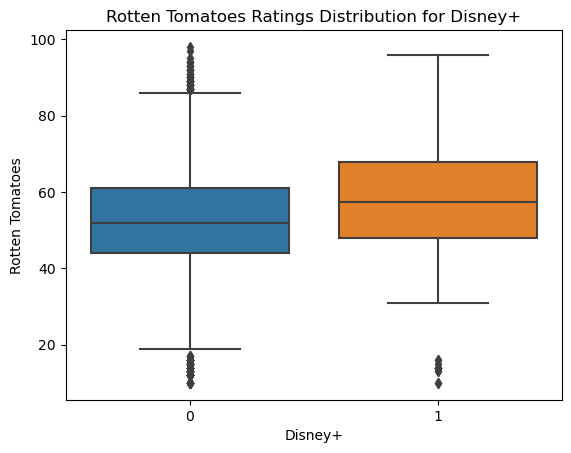

In [63]:
# Visualize correlation between Streaming Platforms and Rotten Tomatoes
# Boxplots
for feature in features:
    sns.boxplot(x=feature, y='Rotten Tomatoes', data=df)
    plt.title(f'Rotten Tomatoes Ratings Distribution for {feature}')
    plt.show()

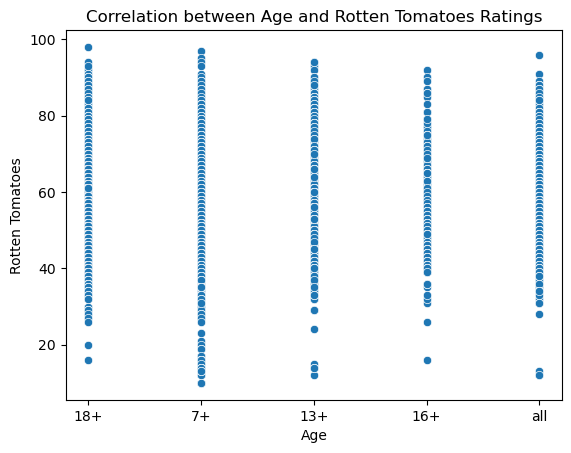

In [67]:
# Visualize correlation between Age and Rotten Tomatoes scores
# Scatterplot
sns.scatterplot(x='Age', y='Rotten Tomatoes', data=df)
plt.title('Correlation between Age and Rotten Tomatoes Ratings')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['18+', '7+', '13+', '16+', 'all'])
plt.show()

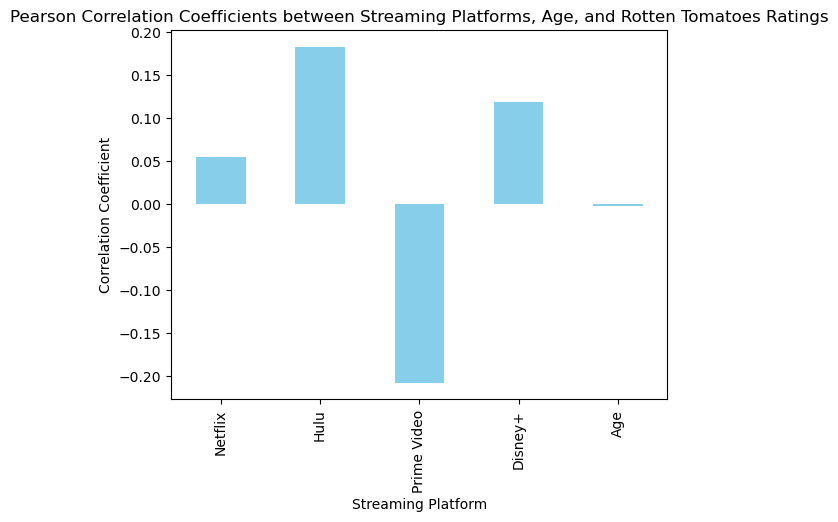

In [74]:
# Correlation Coefficient Plot Streaming Platform
correlations = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Age', 'Rotten Tomatoes']].corr()['Rotten Tomatoes'].drop('Rotten Tomatoes')
correlations.plot(kind='bar', color='skyblue')
plt.title('Pearson Correlation Coefficients between Streaming Platforms, Age, and Rotten Tomatoes Ratings')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Streaming Platform')
plt.show()